## predict the price for used car
dataset:https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [52]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [34]:
df=pd.read_csv('car data.csv')

In [35]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
df.shape

(301, 9)

In [37]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [38]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [39]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
df_final=df.drop(labels=['Car_Name'],axis=1)

In [41]:
df_final['age']=2021-df_final['Year']

In [42]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [43]:
df_final.drop(labels=['Year'],axis=1,inplace=True)

In [44]:
df_final=pd.get_dummies(df_final,drop_first=True)

In [45]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


<AxesSubplot:>

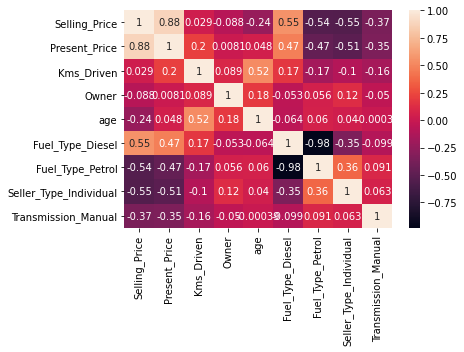

In [55]:
sns.heatmap(df_final.corr(),annot=True)

In [62]:
X=df_final.iloc[:,1:]
y=df_final['Selling_Price']


In [70]:
##feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [71]:
print(model.feature_importances_)

[3.59982162e-01 3.89581353e-02 3.03398188e-04 7.79932402e-02
 2.33258226e-01 1.65992388e-02 1.28457912e-01 1.44447688e-01]


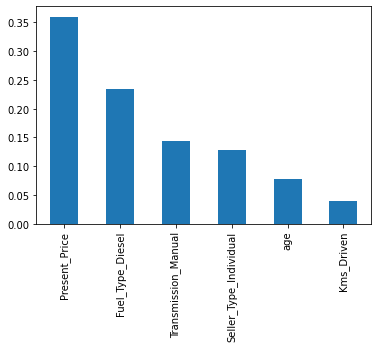

In [78]:
fea_importance=pd.Series(model.feature_importances_,index=X.columns)
fea_importance.nlargest(6).plot(kind='bar')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest
 no need to scale the features in RF

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [87]:
##hyperparameter:
rf_random=RandomForestRegressor()
param_grids={
    'n_estimators':[100,200,300,400,500],
 'max_features':['auto','sqrt'],
 'max_depth':[5,10,15,20]
}
rf_random_grid=GridSearchCV(estimator=rf_random,param_grid=param_grids,cv=5)
    


In [88]:
rf_random_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [89]:
rf_random_grid.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}

In [90]:
prediction=rf_random_grid.predict(X_test)

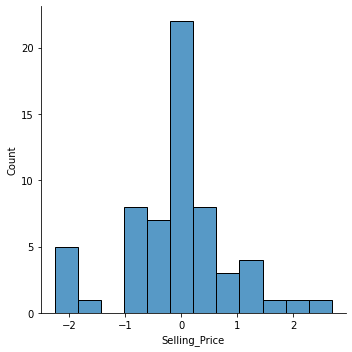

In [91]:
## error has normal distribution, error should be minimal around zero
sns.displot(y_test-prediction)

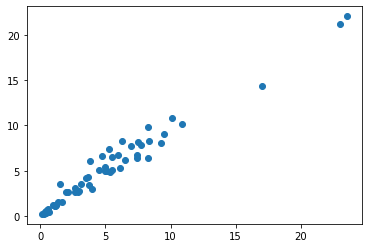

In [92]:
## linearity shows the prediction results are very good
plt.scatter(y_test,prediction)

In [93]:
import pickle
# open a file, where you want to save the data
file=open('random_forest_regression_model.pkl','wb')

##dump information into that file
pickle.dump(rf_random_grid,file)